In [1]:
# For simplicity, run notebook from project root
import os
if os.path.split(os.getcwd())[-1] == "notebooks":
    %cd ..
print(f"Running notebook from {os.getcwd()}")

/Users/kincannonwilson/Desktop/School/Projection-Correction
Running notebook from /Users/kincannonwilson/Desktop/School/Projection-Correction


In [2]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils.read_img import pathToCV2
from utils.transform_recorded import manual_perspective_transforms, transform_recorded_img

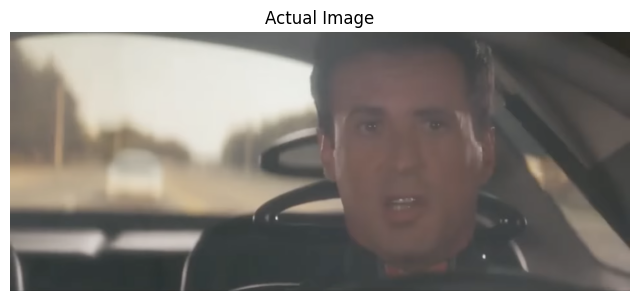

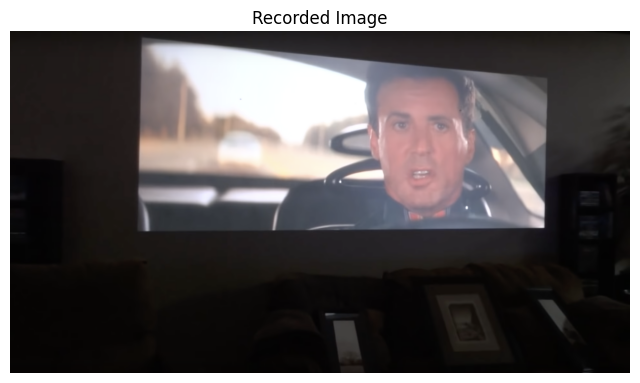

In [3]:
# Start by showing the example images
actual_example_path = os.path.join("inputs", "actual_example1.png")
recorded_example_path = os.path.join("inputs", "recorded_example1.png")
actual_cv2 = pathToCV2(actual_example_path)
recorded_cv2 = pathToCV2(recorded_example_path)

# Display the actual image
plt.figure(figsize=(8, 8))
plt.imshow(actual_cv2)
plt.title('Actual Image')
plt.axis('off')
plt.show()

# Display the recorded image
plt.figure(figsize=(8, 8))
plt.imshow(recorded_cv2)
plt.title('Recorded Image')
plt.axis('off')
plt.show()

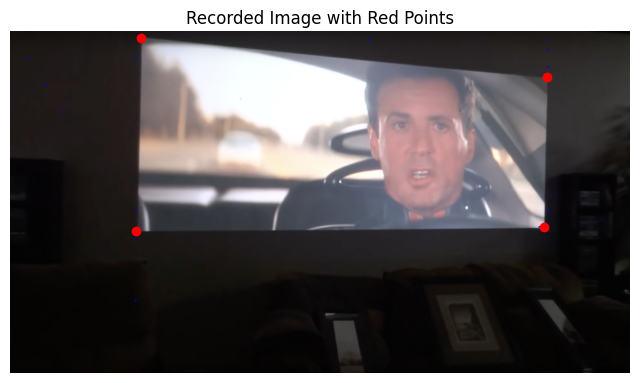

In [60]:
# Draw some red points on image to find projector bounds
points = [(730, 37), (2995, 252), (2975, 1090), (703, 1110)]

for point in points:
    cv2.circle(recorded_cv2, point, 5, (0, 0, 255), -1)

# Display the recorded image with red points
plt.figure(figsize=(8, 8))
plt.imshow(recorded_cv2)
plt.scatter(*zip(*points), color='red', marker='o')
plt.title('Recorded Image with Red Points')
plt.axis('off')
plt.show()


recorded_transformed shape: (1444, 3456, 3)


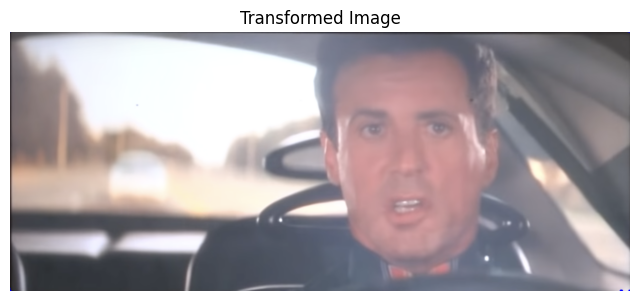

In [61]:
# First, let's manually crop out the desired region
src_pts = np.array(points, dtype=np.float32)
recorded_transformed = manual_perspective_transforms(actual_cv2, recorded_cv2, src_pts)
print(f"recorded_transformed shape: {recorded_transformed.shape}")
plt.figure(figsize=(8, 8))
plt.imshow(recorded_transformed)
plt.title('Transformed Image')
plt.axis('off')
plt.show()